<a href="https://colab.research.google.com/github/rulogar1234/nuclio-1/blob/develop/SUP_ML_1_Preprocessing_Transformersv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUP ML 1 - PREPROCESSING

# Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn import set_config
from sklearn.pipeline import FunctionTransformer
# transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
# pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder


from google.colab import data_table
from vega_datasets import data
data_table.enable_dataframe_formatter()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sklearn.__version__

'1.2.2'

# Importar train data

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TEMPLATE SUP ML (main)/EJERCICIO-ML-SUP/data/telecom_churn_TRAINTEST.csv')

In [ ]:
df.shape

(90000, 100)

In [ ]:
pd.set_option('display.max_columns', 200)
df.head()

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,2.0,1.0,NaN,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,1.0,1.0,NaN,0.0,0.0,NaN,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,R,5.0,M,S,1.0,M,6.0,1.0,C,O,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [ ]:
df_predict=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TEMPLATE SUP ML (main)/EJERCICIO-ML-SUP/data/telecom_churn_PREDICT.csv')

In [ ]:
df_predict.shape

(10000, 99)

In [ ]:
df_predict.head()

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,30.8350,136.75,29.9900,0.2475,1.25,0.500,0.5,0.000,0.0975,48.25,1.1550,2.000000,0.000000,10.333333,0.0,13.333333,0.0,66.000000,0.000000,3.333333,0.0,40.666667,0.000000,1.333333,1.333333,0.896667,0.666667,0.333333,71.746667,0.000000,5.406667,1.333333,0.713333,0.333333,0.473333,30.000000,0.0,54.500000,0.0,13.666667,0.000000,22.653333,0.000000,12.333333,66.000000,40.666667,0.0,0.000000,7,1,1,U,AA,N,393,958.0,248.46,182.94,958.0,393,30.49,159.67,65.50,121,52,30,160.0,66.0,31.0,C,ATLANTIC SOUTH AREA,Y,N,149.98999,1.0,1.0,WCMB,0.0,0.0,R,NaN,M,M,1.0,M,3.0,NaN,C,NaN,1.0,U,U,U,U,U,U,Y,216.0,1090001
1,35.8475,352.75,24.2700,0.4950,23.25,9.285,8.7,0.585,1.8000,-352.75,-35.8475,9.000000,0.000000,0.000000,0.0,10.000000,0.0,82.666667,1.000000,31.000000,0.0,65.333333,1.000000,3.666667,9.000000,5.890000,18.333333,1.333333,98.543333,1.023333,83.666667,15.666667,12.683333,1.333333,14.286667,38.000000,0.0,106.926667,0.0,43.666667,1.000000,75.283333,1.023333,9.000000,83.666667,66.333333,0.0,1.333333,7,1,1,U,EA,Y,1641,4011.0,391.87,305.59,3998.0,1634,50.93,666.33,272.33,470,181,48,666.0,272.0,51.0,C,NORTHWEST/ROCKY MOUNTAIN AREA,T,N,99.98999,2.0,1.0,WCMB,0.0,0.0,NaN,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N,U,U,U,U,U,N,101.0,1090002
2,30.3275,241.50,39.9900,0.0000,0.00,0.000,0.0,0.000,0.0000,-86.50,0.8625,2.000000,0.000000,4.666667,0.0,20.666667,0.0,85.333333,0.000000,26.666667,0.0,59.333333,0.000000,4.333333,6.333333,4.466667,17.000000,1.666667,143.530000,0.000000,27.373333,9.666667,3.760000,19.666667,21.736667,48.666667,0.0,76.356667,0.0,36.000000,0.000000,94.543333,0.000000,6.666667,85.333333,59.333333,0.0,0.333333,9,2,2,Y,A,N,780,1889.0,312.91,219.45,1772.0,734,31.35,253.14,104.86,270,107,30,273.0,109.0,31.0,T,CENTRAL/SOUTH TEXAS AREA,N,N,129.98999,1.0,1.0,WCMB,1.0,0.0,O,13.0,S,M,3.0,M,6.0,1.0,C,A,0.0,N,U,U,U,U,U,Y,262.0,1090003
3,154.6925,2297.00,149.9900,4.7025,0.00,0.000,0.0,0.000,0.0000,119.00,0.2475,20.333333,0.000000,5.000000,0.0,329.333333,0.0,1067.000000,0.000000,628.000000,0.0,723.000000,0.000000,0.333333,0.666667,0.376667,408.000000,0.000000,769.136667,0.000000,679.020000,271.000000,167.090000,68.666667,150.656667,723.000000,0.0,961.736667,0.0,346.000000,0.000000,486.420000,0.000000,25.333333,1067.000000,723.000000,0.0,8.333333,11,1,1,U,AA,N,9018,18478.0,2217.05,2131.17,18478.0,9018,213.12,1847.80,901.80,2257,1045,155,2452.0,1171.0,278.0,S,ATLANTIC SOUTH AREA,N,R,79.98999,2.0,1.0,WCMB,0.0,0.0,O,3.0,S,U,3.0,M,6.0,1.0,NaN,A,0.0,S,U,U,U,U,U,Y,127.0,1090004
4,156.0050,542.25,48.9475,0.7425,70.75,28.295,28.1,0.195,0.0000,195.75,40.0150,5.666667,0.333333,0.666667,0.0,46.333333,0.0,167.666667,0.666667,11.333333,0.0,115.000000,0.333333,21.666667,48.000000,31.346667,10.000000,0.333333,343.066667,0.010000,11.243333,13.000000,14.563333,1.333333,2.100000,91.000000,0.0,205.216667,0.0,31.000000,0.333333,149.096667,0.010000,6.666667,168.333333,115.333333,0.0,0.666667,9,1,1,U,CA,Y,791,2601.0,879.51,608.66,2601.0,791,86.95,371.57,113.00,477,130,143,349.0,103.0,91.0,U,LOS ANGELES AREA,Y,N,149.98999,2.0,1.0,WCMB,0.0,0.0,O,1.0,NaN,S,1.0,M,6.0,1.0,C,NaN,0.0,N,U,U,U,U,U,Y,37.0,1090005


In [ ]:
df_variables=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TEMPLATE SUP ML (main)/EJERCICIO-ML-SUP/data/variable_dictionary.csv')

In [ ]:
print(df_variables.shape)
df_variables

(100, 2)


,Variable,Description
0,rev,Mean monthly revenue (charge amount)
1,mou,Mean number of monthly minutes of use
2,totmrc,Mean total monthly recurring charge
3,da,Mean number of directory assisted calls
4,ovrmou,Mean overage minutes of use
...,...,...
95,kid11_15,Child 11 - 15 years of age in household
96,kid16_17,Child 16 - 17 years of age in household
97,creditcd,Credit card indicator
98,eqpdays,Number of days (age) of current equipment


# EDA: Analisis Exploratorio

## Distribución del target

In [ ]:
#Hay algunas columnas que no son 90000 => nulos, los trataremos más adelante con transformers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               89866 non-null  float64
 1   mou               89866 non-null  float64
 2   totmrc            89866 non-null  float64
 3   da                89866 non-null  float64
 4   ovrmou            89866 non-null  float64
 5   ovrrev            89866 non-null  float64
 6   vceovr            89866 non-null  float64
 7   datovr            89866 non-null  float64
 8   roam              89866 non-null  float64
 9   change_mou        89405 non-null  float64
 10  change_rev        89405 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float

In [ ]:
#Vemos que Customer ID tiene un valor por registro, así que lo asignamos como índice del dataframe
df.set_index('Customer_ID',inplace=True)

In [ ]:
target = 'churn'
features = df.columns[df.columns!=target]

# Divide dataset en matriz de variables (X) y output (y)
X = df[features]
y = df[target]

In [ ]:
target

'churn'

In [ ]:
features

Index(['rev', 'mou', 'totmrc', 'da', 'ovrmou', 'ovrrev', 'vceovr', 'datovr',
       'roam', 'change_mou', 'change_rev', 'drop_vce', 'drop_dat', 'blck_vce',
       'blck_dat', 'unan_vce', 'unan_dat', 'plcd_vce', 'plcd_dat', 'recv_vce',
       'recv_sms', 'comp_vce', 'comp_dat', 'custcare', 'ccrndmou', 'cc_mou',
       'inonemin', 'threeway', 'mou_cvce', 'mou_cdat', 'mou_rvce',
       'owylis_vce', 'mouowylisv', 'iwylis_vce', 'mouiwylisv', 'peak_vce',
       'peak_dat', 'mou_peav', 'mou_pead', 'opk_vce', 'opk_dat', 'mou_opkv',
       'mou_opkd', 'drop_blk', 'attempt', 'complete', 'callfwdv', 'callwait',
       'months', 'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag',
       'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev',
       'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou',
       'avg6qty', 'avg6rev', 'prizm_social_one', 'area', 'dualband',
       'refurb_new', 'hnd_price', 'phones', 'models', 'hnd_webcap', 'truck',
       'rv', 'ownr

In [ ]:
#Miramos posibles outlayers en los campos numéricos
pd.DataFrame([df.describe().T.iloc[:,7],df.describe().T.iloc[:,3]]).T

,max,min
rev,3843.2625,-5.8625
mou,12206.7500,0.0000
totmrc,409.9900,-26.9150
da,159.3900,0.0000
ovrmou,4320.7500,0.0000
...,...,...
adults,6.0000,1.0000
income,9.0000,1.0000
numbcars,3.0000,1.0000
forgntvl,1.0000,0.0000


## Analisis Univariable

* Distribucion de cada variable

new_cell 
 U    58812
Y    18114
N    13074
Name: new_cell, dtype: int64 

crclscod 
 AA    34152
A     15602
BA    11270
CA     7389
EA     5521
B      3743
DA     3201
ZA     3177
C      1418
A2      771
U       429
E       330
E4      305
GA      265
D       244
G       236
I       231
JF      192
Z       187
J       169
M       153
C2      152
D4      107
Z4       94
K        93
W        84
V1       70
U1       56
EM       46
B2       42
Y        38
EC       32
O        24
CY       21
E2       19
CC       19
D5       16
C5       14
IF       14
ZY       12
Z1       11
Z5        8
H         8
TP        5
D2        5
GY        5
L         4
EF        4
Z2        4
A3        3
P1        2
S         1
V         1
ZF        1
Name: crclscod, dtype: int64 

asl_flag 
 N    79401
Y    10599
Name: asl_flag, dtype: int64 

prizm_social_one 
 S    29203
U    20935
C    15244
T    13705
R     4376
Name: prizm_social_one, dtype: int64 

area 
 NEW YORK CITY AREA               10293
DC/MARYLAND/

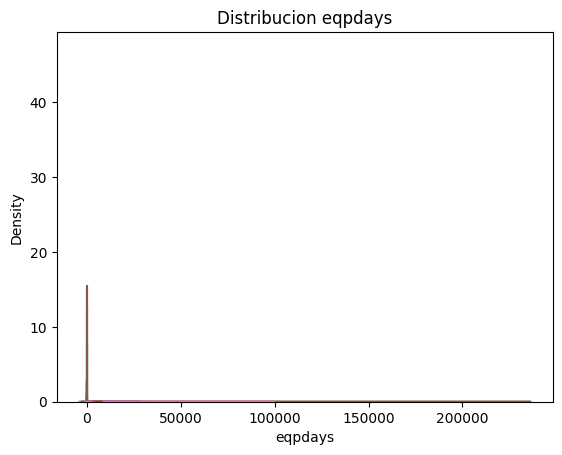

In [ ]:
 #Analisis de las distribuciones de las variables
 for i in features:
  if (df[i].dtype.kind=="f") or (df[i].dtype.kind=="i"):
    sns.distplot(df[i])
    plt.title('Distribucion '+i)
    #Comentamos temporalmente para ayudar en las ejecuciones iterativas
    #plt.show()
  elif df[i].dtype.kind == "O":
    print(i,'\n', df[i].value_counts(), '\n')

## Analisis Variable-Target

* Relacion target-variable

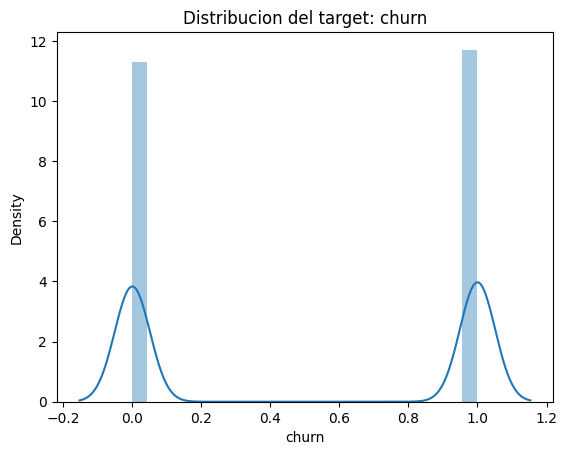

In [ ]:
#Distribucion target
sns.distplot(y)
plt.title('Distribucion del target: '+target)
plt.show()

# Data Cleaning

* Eliminar filas sin target informado.
* Eliminar filas duplicadas (si tenemos ID, solo puede haber 1 registro por ID)
* Eliminar filas/columnas vacías y columnas irrelevantes
* Corregir data types incorrectos
* Categoricos: Corregir literales incorrectos (acentos, erratas, etc)
* Fechas y textos: convertir a variables numericas (hour, day, month, year...) o categoricas (weekday_name...)

In [ ]:
#Vemos si hay filas sin target
# Check si hay filas sin target
df['churn'].isna().any()

False

In [ ]:
# Check duplicados
df.index.nunique() != len(df.index)

False

In [ ]:
def check_data_types(df):
    for col_name, col_type in df.dtypes.items():
        col_data = df[col_name]
        if col_type == np.float64 and np.issubdtype(col_data.dtype, np.integer):
            print(f"La columna {col_name} es de tipo float64 pero solo contiene datos de tipo int64")
            return 1
        elif col_type == np.int64 and np.issubdtype(col_data.dtype, np.floating):
            print(f"La columna {col_name} es de tipo int64 pero solo contiene datos de tipo float64")
            return 1
        elif col_type == np.object_ and np.issubdtype(col_data.dtype, np.datetime64):
            print(f"La columna {col_name} es de tipo object pero solo contiene datos de tipo datetime64")
            return 1
        elif col_type == np.datetime64 and np.issubdtype(col_data.dtype, np.object_):
            print(f"La columna {col_name} es de tipo datetime64 pero solo contiene datos de tipo object")
            return 1
        elif col_type != col_data.dtype:
            print(f"La columna {col_name} es de tipo {col_type} pero contiene datos de tipo {col_data.dtype}")
            return 1
    return 0


In [ ]:
#parece que las columnas corresponden con el contenido
check_data_types(df)


0

In [ ]:
#Vemos los valores de las categoricas a ver si hay carácteres con posibles errores de acentos etc....
#Ya vimos en ver_var_class(df) que no hay problemas de ese tipo

In [ ]:
#no hay fechas y tampoco parece que haya erratas

In [ ]:
#Después de un estudio de los datos se deciden quitar al menos de momento los siguientes columnas que nosaventuramos a decir que son irrelevantes:
#dualband: Banda Dual
#infobase: Concidencia Infobase, no sé lo que es pero de los valores que solo hay uno entiendo que no vamos a sacar información relevante
#HHstatin: indicador del estado del hogar premier: no se que es pero no creo que algo relacionado con el hogar aporte mucho además tien muchas categorías y ensucia bastante el dataset
#ethnic: Muchas categorías y no creo que la etnia influya
#truck: Indicador de camión, no sé lo que es, es una variable binaria, dudo que influya por el nombre
#models: Número de modelos emitidos, entinedo que es irrelevante
#rv: Indicador RV, no sabemos lo que es, lo borramos
#lor: Antigüedad de la vivienda, muchos nulos y creo que será irrelevante
#dwlltype:creo que ya hay bastantes categoríasque tiene que ver con el poder adquisitivo del cliente y su vivienda
#numbcars: demasiados nulos
#forgntvl: Variable ficticia de viajes al extranjero;: ya el nombre tira para atrás
#Todas las de hijos las vamos a agrupar en una sola ordinal

df.drop('dualband', axis=1, inplace=True)
df.drop('infobase', axis=1, inplace=True)
df.drop('HHstatin', axis=1, inplace=True)
df.drop('ethnic', axis=1, inplace=True)
df.drop('truck', axis=1, inplace=True)
df.drop('rv', axis=1, inplace=True)
df.drop('lor', axis=1, inplace=True)
df.drop('dwlltype', axis=1, inplace=True)
df.drop('numbcars', axis=1, inplace=True)
df.drop('forgntvl', axis=1, inplace=True)

In [ ]:
#Borramos registros que no tienen informado y que son insignificantes
filtro1 = df['refurb_new'].isnull()
df = df.drop(df[filtro1].index)

In [ ]:
filtro1 = df['phones'].isnull()
df = df.drop(df[filtro1].index)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89999 entries, 1000001 to 1090000
Data columns (total 89 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               89865 non-null  float64
 1   mou               89865 non-null  float64
 2   totmrc            89865 non-null  float64
 3   da                89865 non-null  float64
 4   ovrmou            89865 non-null  float64
 5   ovrrev            89865 non-null  float64
 6   vceovr            89865 non-null  float64
 7   datovr            89865 non-null  float64
 8   roam              89865 non-null  float64
 9   change_mou        89404 non-null  float64
 10  change_rev        89404 non-null  float64
 11  drop_vce          89999 non-null  float64
 12  drop_dat          89999 non-null  float64
 13  blck_vce          89999 non-null  float64
 14  blck_dat          89999 non-null  float64
 15  unan_vce          89999 non-null  float64
 16  unan_dat          89999 non-null

In [ ]:
#hacemos copia
df2 = df.copy()

# **Tratamiento de outlayers**

In [ ]:
#LAs variables mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,avg6mou,avg6qty,avg6rev que tienen muy pocos (umbral 200) nulos les pondremosa outlayer con un transformer
nulos_por_columna=df2.isnull().sum()
indice_pocos_nulos=nulos_por_columna[nulos_por_columna<140].index
indice_pocos_nulos

Index(['rev', 'mou', 'totmrc', 'da', 'ovrmou', 'ovrrev', 'vceovr', 'datovr',
       'roam', 'drop_vce', 'drop_dat', 'blck_vce', 'blck_dat', 'unan_vce',
       'unan_dat', 'plcd_vce', 'plcd_dat', 'recv_vce', 'recv_sms', 'comp_vce',
       'comp_dat', 'custcare', 'ccrndmou', 'cc_mou', 'inonemin', 'threeway',
       'mou_cvce', 'mou_cdat', 'mou_rvce', 'owylis_vce', 'mouowylisv',
       'iwylis_vce', 'mouiwylisv', 'peak_vce', 'peak_dat', 'mou_peav',
       'mou_pead', 'opk_vce', 'opk_dat', 'mou_opkv', 'mou_opkd', 'drop_blk',
       'attempt', 'complete', 'callfwdv', 'callwait', 'churn', 'months',
       'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls',
       'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou',
       'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'area', 'refurb_new',
       'phones', 'models', 'eqpdays'],
      dtype='object')

In [ ]:
#Las categóricas que quedan también les pondremos U o Unknown dependiendo como sea cada una de ellas

In [ ]:
 #Analisis de las distribuciones de las variables , visto de los pasos anteriores
 #eqpdays	Número de días (edad) del equipo actual, tiene valores negativos, imposible, miramos las filas que tiene valores negativos, creo que la mejor estrategía va a ser asignar un outlayer más adelante en el transformer
df2['eqpdays'][df2['eqpdays']<0].value_counts()


-3.0    32
-1.0    27
-2.0    26
-4.0    12
-5.0     5
Name: eqpdays, dtype: int64

In [ ]:
#Respecto a categóricas

# Imputación de nulos

* MODELOS DE ARBOLES: Imputar valor outlier.
* MODELOS LINEALES: imputar media, mediana o moda.
* Si vamos a practicar un Torneo de Modelos, preferible imputar valor outlier.

In [ ]:
def columnas_con_nulos(dataframe):
    columnas_nulas = dataframe.columns[dataframe.isnull().any()].tolist()
    return columnas_nulas
def crear_dataframe_nulos(dataframe):
    columnas_nulas = columnas_con_nulos(dataframe)
    df_nulos = dataframe[columnas_nulas].copy()
    return df_nulos

# Crear el DataFrame con las columnas que tienen valores nulos y sus valores correspondientes para poder trabajar con undataset más pequeño
df_nulos = crear_dataframe_nulos(df2)

In [ ]:
df_nulos

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,hnd_price,hnd_webcap,ownrent,marital,adults,income,dwllsize,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000001,23.9975,219.25,22.500,0.2475,0.00,0.000,0.0,0.000,0.0000,-157.25,-18.9975,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,149.98999,WCMB,O,S,1.0,4.0,A,U,U,U,U,U,Y
1000002,57.4925,482.75,37.425,0.2475,22.75,9.100,9.1,0.000,0.0000,532.25,50.9875,477.0,275.0,48.0,U,CHICAGO AREA,NaN,WC,NaN,S,1.0,5.0,A,U,U,U,U,U,Y
1000003,16.9900,10.25,16.990,0.0000,0.00,0.000,0.0,0.000,0.0000,-4.25,0.0000,11.0,6.0,17.0,S,GREAT LAKES AREA,29.98999,NaN,O,M,2.0,5.0,A,U,Y,U,U,U,Y
1000004,38.0000,7.50,38.000,0.0000,0.00,0.000,0.0,0.000,0.0000,-1.50,0.0000,50.0,25.0,40.0,T,CHICAGO AREA,29.98999,NaN,NaN,M,4.0,6.0,D,Y,U,U,U,U,Y
1000005,55.2300,570.50,71.980,0.0000,0.00,0.000,0.0,0.000,0.0000,38.50,0.0000,586.0,196.0,80.0,U,NEW ENGLAND AREA,149.98999,WCMB,R,S,1.0,6.0,O,U,U,U,U,U,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089996,125.2700,936.25,79.990,0.0000,131.75,52.700,52.7,0.000,2.5800,109.75,-22.5000,1027.0,252.0,136.0,S,DC/MARYLAND/VIRGINIA AREA,59.98999,WCMB,O,A,2.0,6.0,A,U,U,U,U,U,Y
1089997,72.7450,455.00,69.990,0.9900,29.50,11.765,10.4,1.365,0.0000,-241.00,-7.2950,515.0,280.0,69.0,T,MIDWEST AREA,99.98999,WCMB,O,A,3.0,7.0,A,U,U,U,U,U,Y
1089998,59.7300,830.50,59.990,0.7425,22.25,8.900,8.9,0.000,0.0975,159.50,-5.9500,705.0,199.0,56.0,S,HOUSTON AREA,149.98999,WCMB,NaN,M,1.0,9.0,A,U,U,U,U,Y,Y


In [ ]:
df_nulos.shape

(89999, 29)

In [ ]:
df_nulos.isnull().sum()

rev                   134
mou                   134
totmrc                134
da                    134
ovrmou                134
ovrrev                134
vceovr                134
datovr                134
roam                  134
change_mou            595
change_rev            595
avg6mou              1407
avg6qty              1407
avg6rev              1407
prizm_social_one     6537
area                   40
hnd_price             703
hnd_webcap           9518
ownrent             29490
marital              1451
adults              20032
income              22195
dwllsize            33763
kid0_2               1451
kid3_5               1451
kid6_10              1451
kid11_15             1451
kid16_17             1451
creditcd             1451
dtype: int64

In [ ]:
#creamos una lista con los nombres de las columnas clasificatorias con nulos
#indice_clasif=df_nulos.select_dtypes(include='object').columns.tolist()
#indice_clasif

['prizm_social_one',
 'area',
 'hnd_webcap',
 'ownrent',
 'marital',
 'dwllsize',
 'kid0_2',
 'kid3_5',
 'kid6_10',
 'kid11_15',
 'kid16_17',
 'creditcd']

In [ ]:
#Hacemos una función para separar las variables que deben tener U y las que deben tener Unknown y las qye deberán tratarse con un ordinal (kids)
valores_clasif_1=[]
valores_clasif_mas=[]
valores_clasif_kid=[]
for i in indice_clasif:
  l=df_nulos[i].str.len().max()
  kid=i.startswith("kid")
  if l == 1 and kid==False:
    valores_clasif_1.append(i)
  elif l == 1 and kid==True:
    valores_clasif_kid.append(i)
  else:
    valores_clasif_mas.append(i)

print(valores_clasif_1)

['prizm_social_one', 'ownrent', 'marital', 'dwllsize', 'creditcd']


In [ ]:
print(valores_clasif_mas)

['area', 'hnd_webcap']


In [ ]:
# creamos una lista de valores numericos con nulos
valores_clasif_num=df_nulos.select_dtypes(include=['float64','int64']).columns.tolist()
print(valores_clasif_num)

['rev', 'mou', 'totmrc', 'da', 'ovrmou', 'ovrrev', 'vceovr', 'datovr', 'roam', 'change_mou', 'change_rev', 'avg6mou', 'avg6qty', 'avg6rev', 'hnd_price', 'adults', 'income']


In [ ]:
#Vamos a quitar hnd_price por que le vamo a aplicar la media
valores_clasif_num.remove('hnd_price')
media_hnd_price=df2['hnd_price'].mean()
media_hnd_price

99.70957487428218

In [ ]:
#miramos el mínimo valor en todo el dataframe para decir un número que sea un buen outlayer outlayer
df_describe=df2.describe().T
#vemos que valor puede ser un buen outlayer con el min
df_min=pd.DataFrame(df_describe.iloc[:,3], columns=['min'])
#multiplicamos el minimo por 1000 para conseguir el outlayer
outlayer_num=df_min['min'].min()*1000
outlayer_num

-3875000.0

In [ ]:
#para que las salidas sean dataframes
set_config(transform_output = "pandas")

In [ ]:
#creamos una función para el futuro transformer de eqpdays negativos
def eqpdays_outlayers_assign(X):
    X.loc[X['eqpdays'] < 0, 'eqpdays'] = -9999
    X.loc[X['eqpdays'] >= 0, 'eqpdays'] = X['eqpdays']
    return X


In [ ]:
#creamos una función para hacer tratamiento ordinal del campo tipo kids
def kids0_2_outlayers_assign(X):
  X.loc[X['kid0_2'] == 'Y','kid0_2'] = 1
  X.loc[X['kid0_2'] == 'U','kid0_2'] = 0
  X.loc[X['kid0_2'].isnull(),'kid0_2'] = -9999
  return X

def kids3_5_outlayers_assign(X):
  X.loc[X['kid3_5'] == 'Y','kid3_5'] = 2
  X.loc[X['kid3_5'] == 'U','kid3_5'] = 0
  X.loc[X['kid3_5'].isnull(),'kid3_5'] = -9999
  return X

def kids6_10_outlayers_assign(X):
  X.loc[X['kid6_10'] == 'Y','kid6_10'] = 3
  X.loc[X['kid6_10'] == 'U','kid6_10'] = 0
  X.loc[X['kid6_10'].isnull(),'kid6_10'] = -9999
  return X

def kids11_15_outlayers_assign(X):
  X.loc[X['kid11_15'] == 'Y','kid11_15'] = 4
  X.loc[X['kid11_15'] == 'U','kid11_15'] = 0
  X.loc[X['kid11_15'].isnull(),'kid11_15'] = -9999
  return X

def kids16_17_outlayers_assign(X):
  X.loc[X['kid16_17'] == 'Y','kid16_17'] = 5
  X.loc[X['kid16_17'] == 'U','kid16_17'] = 0
  X.loc[X['kid16_17'].isnull(),'kid16_17'] = -9999
  return X


In [ ]:
#Vamos a imputar los valores con ColumnTransform
impute = ColumnTransformer(
    transformers=[
        ("col_1",SimpleImputer(strategy="constant",fill_value='-U'),valores_clasif_1),
        ("col_mas",SimpleImputer(strategy="constant",fill_value='-Unknown'),valores_clasif_mas),
        ("col_num",SimpleImputer(strategy="constant",fill_value=outlayer_num),valores_clasif_num),
        ("hnd_price",SimpleImputer(strategy="constant",fill_value=media_hnd_price),["hnd_price"]),
        ("eqpdays",FunctionTransformer(func=eqpdays_outlayers_assign),['eqpdays']),
        ("kid_1",FunctionTransformer(func=kids0_2_outlayers_assign),['kid0_2']),
        ("kid_2",FunctionTransformer(func=kids3_5_outlayers_assign),['kid3_5']),
        ("kid_3",FunctionTransformer(func=kids6_10_outlayers_assign),['kid6_10']),
        ("kid_4",FunctionTransformer(func=kids11_15_outlayers_assign),['kid11_15']),
        ("kid_5",FunctionTransformer(func=kids16_17_outlayers_assign),['kid16_17'])
    ],
    remainder='passthrough'
)

In [ ]:
#aplicamos fit y transform
df_t=impute.fit_transform(df)

In [ ]:
df_t.shape

(89999, 89)

In [ ]:
df_t.head()

,col_1__prizm_social_one,col_1__ownrent,col_1__marital,col_1__dwllsize,col_1__creditcd,col_mas__area,col_mas__hnd_webcap,col_num__rev,col_num__mou,col_num__totmrc,col_num__da,col_num__ovrmou,col_num__ovrrev,col_num__vceovr,col_num__datovr,col_num__roam,col_num__change_mou,col_num__change_rev,col_num__avg6mou,col_num__avg6qty,col_num__avg6rev,col_num__adults,col_num__income,hnd_price__hnd_price,eqpdays__eqpdays,kid_1__kid0_2,kid_2__kid3_5,kid_3__kid6_10,kid_4__kid11_15,kid_5__kid16_17,remainder__drop_vce,remainder__drop_dat,remainder__blck_vce,remainder__blck_dat,remainder__unan_vce,remainder__unan_dat,remainder__plcd_vce,remainder__plcd_dat,remainder__recv_vce,remainder__recv_sms,remainder__comp_vce,remainder__comp_dat,remainder__custcare,remainder__ccrndmou,remainder__cc_mou,remainder__inonemin,remainder__threeway,remainder__mou_cvce,remainder__mou_cdat,remainder__mou_rvce,remainder__owylis_vce,remainder__mouowylisv,remainder__iwylis_vce,remainder__mouiwylisv,remainder__peak_vce,remainder__peak_dat,remainder__mou_peav,remainder__mou_pead,remainder__opk_vce,remainder__opk_dat,remainder__mou_opkv,remainder__mou_opkd,remainder__drop_blk,remainder__attempt,remainder__complete,remainder__callfwdv,remainder__callwait,remainder__churn,remainder__months,remainder__uniqsubs,remainder__actvsubs,remainder__new_cell,remainder__crclscod,remainder__asl_flag,remainder__totcalls,remainder__totmou,remainder__totrev,remainder__adjrev,remainder__adjmou,remainder__adjqty,remainder__avgrev,remainder__avgmou,remainder__avgqty,remainder__avg3mou,remainder__avg3qty,remainder__avg3rev,remainder__refurb_new,remainder__phones,remainder__models
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000001,S,O,S,A,Y,NORTHWEST/ROCKY MOUNTAIN AREA,WCMB,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,322.0,136.0,38.0,1.0,4.0,149.989990,361.0,0,0,0,0,0,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,N,2.0,2.0
1000002,U,-U,S,A,Y,CHICAGO AREA,WC,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,477.0,275.0,48.0,1.0,5.0,99.709575,240.0,0,0,0,0,0,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,N,7.0,6.0
1000003,S,O,M,A,Y,GREAT LAKES AREA,-Unknown,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,11.0,6.0,17.0,2.0,5.0,29.989990,1504.0,0,2,0,0,0,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,N,2.0,1.0
1000004,T,-U,M,D,Y,CHICAGO AREA,-Unknown,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,50.0,25.0,40.0,4.0,6.0,29.989990,1812.0,1,0,0,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,N,1.0,1.0
1000005,U,R,S,O,Y,NEW ENGLAND AREA,WCMB,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50

In [ ]:
#Ya no hay nulos
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89999 entries, 1000001 to 1090000
Data columns (total 89 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   col_1__prizm_social_one  89999 non-null  object 
 1   col_1__ownrent           89999 non-null  object 
 2   col_1__marital           89999 non-null  object 
 3   col_1__dwllsize          89999 non-null  object 
 4   col_1__creditcd          89999 non-null  object 
 5   col_mas__area            89999 non-null  object 
 6   col_mas__hnd_webcap      89999 non-null  object 
 7   col_num__rev             89999 non-null  float64
 8   col_num__mou             89999 non-null  float64
 9   col_num__totmrc          89999 non-null  float64
 10  col_num__da              89999 non-null  float64
 11  col_num__ovrmou          89999 non-null  float64
 12  col_num__ovrrev          89999 non-null  float64
 13  col_num__vceovr          89999 non-null  float64
 14  col_num__datov

# Encoding categóricos

* Si tienen sentido ordinal, es decir, se pueden ordenar, encodear con una escala numerica. Ejemplo: {"Bajo":1, "Medio":2, "Alto":3}.
* Si tienen unicamente 2 clases, indicador booleano
* One Hot Encoding en resto de categoricos

In [ ]:
#A esta columan le vamos a plicar un ordinal encoding que lo hace por orden alfabético lo cual parece correcto para este campo
df_t.groupby('remainder__crclscod')['remainder__crclscod'].count()

remainder__crclscod
A     15602
A2      771
A3        3
AA    34151
B      3743
B2       42
BA    11270
C      1418
C2      152
C5       14
CA     7389
CC       19
CY       21
D       244
D2        5
D4      107
D5       16
DA     3201
E       330
E2       19
E4      305
EA     5521
EC       32
EF        4
EM       46
G       236
GA      265
GY        5
H         8
I       231
IF       14
J       169
JF      192
K        93
L         4
M       153
O        24
P1        2
S         1
TP        5
U       429
U1       56
V         1
V1       70
W        84
Y        38
Z       187
Z1       11
Z2        4
Z4       94
Z5        8
ZA     3177
ZF        1
ZY       12
Name: remainder__crclscod, dtype: int64

In [ ]:
OrdinalEncoder().fit_transform(df_t[['remainder__crclscod']]).value_counts()

remainder__crclscod
3.0                    34151
0.0                    15602
6.0                    11270
10.0                    7389
21.0                    5521
4.0                     3743
17.0                    3201
51.0                    3177
7.0                     1418
1.0                      771
40.0                     429
18.0                     330
20.0                     305
26.0                     265
13.0                     244
25.0                     236
29.0                     231
32.0                     192
46.0                     187
31.0                     169
35.0                     153
8.0                      152
15.0                     107
49.0                      94
33.0                      93
44.0                      84
43.0                      70
41.0                      56
24.0                      46
5.0                       42
45.0                      38
22.0                      32
36.0                      24
12.0                   

In [ ]:
df_t.groupby('remainder__asl_flag')['remainder__asl_flag'].count()

remainder__asl_flag
N    79400
Y    10599
Name: remainder__asl_flag, dtype: int64

In [ ]:
#Binario, aplicamos ordinal encoder
OrdinalEncoder().fit_transform(df_t[['remainder__asl_flag']]).value_counts()

remainder__asl_flag
0.0                    79400
1.0                    10599
dtype: int64

In [ ]:
df_t.groupby('remainder__refurb_new')['remainder__refurb_new'].count()

remainder__refurb_new
N    76624
R    13375
Name: remainder__refurb_new, dtype: int64

In [ ]:
#Binario, aplicamos ordinal encoder
OrdinalEncoder().fit_transform(df_t[['remainder__refurb_new']]).value_counts()

remainder__refurb_new
0.0                      76624
1.0                      13375
dtype: int64

In [ ]:
df_t.groupby('col_1__dwllsize')['col_1__dwllsize'].count()

col_1__dwllsize
-U    33763
A     43118
B      4743
C      1357
D       678
E       490
F       373
G       319
H       265
I       241
J      1280
K       595
L       449
M       344
N       905
O      1079
Name: col_1__dwllsize, dtype: int64

In [ ]:
#función de ordinal encoder pero poniendo un outlayer para el -U
def dwllsize_oe(X):
  X.loc[X['col_1__dwllsize'].isin(['A']) ,'col_1__dwllsize'] = 1
  X.loc[X['col_1__dwllsize'].isin(['B']),'col_1__dwllsize'] = 2
  X.loc[X['col_1__dwllsize'].isin(['C']),'col_1__dwllsize'] = 3
  X.loc[X['col_1__dwllsize'].isin(['D']),'col_1__dwllsize'] = 5
  X.loc[X['col_1__dwllsize'].isin(['E']),'col_1__dwllsize'] = 6
  X.loc[X['col_1__dwllsize'].isin(['F']),'col_1__dwllsize'] =7
  X.loc[X['col_1__dwllsize'].isin(['G']) ,'col_1__dwllsize'] = 8
  X.loc[X['col_1__dwllsize'].isin(['H']),'col_1__dwllsize'] = 9
  X.loc[X['col_1__dwllsize'].isin(['I']),'col_1__dwllsize'] = 10
  X.loc[X['col_1__dwllsize'].isin(['J']),'col_1__dwllsize'] = 11
  X.loc[X['col_1__dwllsize'].isin(['K']),'col_1__dwllsize'] = 12
  X.loc[X['col_1__dwllsize'].isin(['L']),'col_1__dwllsize'] =13
  X.loc[X['col_1__dwllsize'].isin(['M']),'col_1__dwllsize'] = 14
  X.loc[X['col_1__dwllsize'].isin(['N']),'col_1__dwllsize'] = 15
  X.loc[X['col_1__dwllsize'].isin(['O']),'col_1__dwllsize'] = 16
  X.loc[X['col_1__dwllsize'].isin(['-U']),'col_1__dwllsize'] = -9999
  return X


In [ ]:
#muchas categorías sin relación aparente, ONE HOT ENCODING
#Las columnas en las que haremos un ONE HOT ENCODING son aquellas categóricas en las que existen más de 2 valores y que no tienen una relación de ordinalidad en nuestro caso
#new_cell, prizm_social_one, area, hnd_webcap, ownrent, marital, creditcd

In [ ]:
df_t.groupby(["col_mas__area"])["col_mas__area"].count()

col_mas__area
-Unknown                            40
ATLANTIC SOUTH AREA               5526
CALIFORNIA NORTH AREA             5476
CENTRAL/SOUTH TEXAS AREA          3962
CHICAGO AREA                      4762
DALLAS AREA                       5106
DC/MARYLAND/VIRGINIA AREA         5924
GREAT LAKES AREA                  4276
HOUSTON AREA                      3887
LOS ANGELES AREA                  4556
MIDWEST AREA                      5891
NEW ENGLAND AREA                  5090
NEW YORK CITY AREA               10293
NORTH FLORIDA AREA                3996
NORTHWEST/ROCKY MOUNTAIN AREA     4013
OHIO AREA                         4260
PHILADELPHIA AREA                 2263
SOUTH FLORIDA AREA                3118
SOUTHWEST AREA                    5006
TENNESSEE AREA                    2554
Name: col_mas__area, dtype: int64

In [ ]:
OneHotEncoder(sparse_output=False).fit_transform(df_t[["col_mas__area"]]).head(1)

,col_mas__area_-Unknown,col_mas__area_ATLANTIC SOUTH AREA,col_mas__area_CALIFORNIA NORTH AREA,col_mas__area_CENTRAL/SOUTH TEXAS AREA,col_mas__area_CHICAGO AREA,col_mas__area_DALLAS AREA,col_mas__area_DC/MARYLAND/VIRGINIA AREA,col_mas__area_GREAT LAKES AREA,col_mas__area_HOUSTON AREA,col_mas__area_LOS ANGELES AREA,col_mas__area_MIDWEST AREA,col_mas__area_NEW ENGLAND AREA,col_mas__area_NEW YORK CITY AREA,col_mas__area_NORTH FLORIDA AREA,col_mas__area_NORTHWEST/ROCKY MOUNTAIN AREA,col_mas__area_OHIO AREA,col_mas__area_PHILADELPHIA AREA,col_mas__area_SOUTH FLORIDA AREA,col_mas__area_SOUTHWEST AREA,col_mas__area_TENNESSEE AREA
Customer_ID,,,,,,,,,,,,,,,,,,,,
1000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_t.groupby('col_1__prizm_social_one')['col_1__prizm_social_one'].count()

col_1__prizm_social_one
-U     6537
C     15244
R      4376
S     29203
T     13705
U     20934
Name: col_1__prizm_social_one, dtype: int64

In [ ]:
OneHotEncoder(sparse_output=False).fit_transform(df_t[["col_1__prizm_social_one"]]).head(1)

,col_1__prizm_social_one_-U,col_1__prizm_social_one_C,col_1__prizm_social_one_R,col_1__prizm_social_one_S,col_1__prizm_social_one_T,col_1__prizm_social_one_U
Customer_ID,,,,,,
1000001,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_t.groupby('remainder__new_cell')['remainder__new_cell'].count()

remainder__new_cell
N    13074
U    58811
Y    18114
Name: remainder__new_cell, dtype: int64

In [ ]:
OneHotEncoder(sparse_output=False).fit_transform(df_t[["remainder__new_cell"]]).head(1)

,remainder__new_cell_N,remainder__new_cell_U,remainder__new_cell_Y
Customer_ID,,,
1000001,0.0,1.0,0.0


In [ ]:
df_t.groupby('col_mas__hnd_webcap')['col_mas__hnd_webcap'].count()

col_mas__hnd_webcap
-Unknown     9518
UNKW          202
WC          12883
WCMB        67396
Name: col_mas__hnd_webcap, dtype: int64

In [ ]:
OneHotEncoder(sparse_output=False).fit_transform(df_t[["col_mas__hnd_webcap"]]).head(1)

,col_mas__hnd_webcap_-Unknown,col_mas__hnd_webcap_UNKW,col_mas__hnd_webcap_WC,col_mas__hnd_webcap_WCMB
Customer_ID,,,,
1000001,0.0,0.0,0.0,1.0


In [ ]:
#unimos las categorías -unknown con UNKW que siginifican lo mismo
def hnd_webcap_unkw(X):
    X.loc[X['col_mas__hnd_webcap'] == '-Unknown', 'col_mas__hnd_webcap'] = 'UNKW'
    X.loc[X['col_mas__hnd_webcap'] != '-Unknown', 'col_mas__hnd_webcap'] = X['col_mas__hnd_webcap']
    return X

In [ ]:
df_t.groupby('col_1__ownrent')['col_1__ownrent'].count()

col_1__ownrent
-U    29490
O     58729
R      1780
Name: col_1__ownrent, dtype: int64

In [ ]:
df_t.groupby('col_1__marital')['col_1__marital'].count()

col_1__marital
-U     1451
A      4738
B      6391
M     28419
S     15951
U     33049
Name: col_1__marital, dtype: int64

In [ ]:
df_t.groupby('col_1__creditcd')['col_1__creditcd'].count()

col_1__creditcd
-U     1451
N     26832
Y     61716
Name: col_1__creditcd, dtype: int64

In [ ]:
#sumamos en una columna para hacer un campo único kid ordinal
def kid_assign(X):
  resultado =  X['kid_1__kid0_2']+X['kid_2__kid3_5']+X['kid_3__kid6_10']+X['kid_4__kid11_15']+X['kid_5__kid16_17']
  return pd.DataFrame(resultado, columns=['kids'])

In [ ]:
impute2 = ColumnTransformer(
    transformers=[
         ("col_kid",FunctionTransformer(func=kid_assign),['kid_1__kid0_2','kid_2__kid3_5','kid_3__kid6_10','kid_4__kid11_15','kid_5__kid16_17']),
         ("crclscod",OrdinalEncoder(),['remainder__crclscod']),
         ("asl_flag",OrdinalEncoder(),['remainder__asl_flag']),
         ("refurb_new",OrdinalEncoder(),['remainder__refurb_new']),
         ("dwllsize",FunctionTransformer(func=dwllsize_oe),['col_1__dwllsize']),
         ("hnd_webcap",FunctionTransformer(func=hnd_webcap_unkw),['col_mas__hnd_webcap']),
         ("area",OneHotEncoder(sparse_output=False),["col_mas__area"]),
         ("prizm_social_one",OneHotEncoder(sparse_output=False),["col_1__prizm_social_one"]),
         ("new_cell",OneHotEncoder(sparse_output=False),["remainder__new_cell"]),
         ("ownrent",OneHotEncoder(sparse_output=False),["col_1__ownrent"]),
         ("marital",OneHotEncoder(sparse_output=False),["col_1__marital"]),
         ("creditcd",OneHotEncoder(sparse_output=False),["col_1__creditcd"])
    ],
    remainder='passthrough'
)

In [ ]:
#aplicamos fit y transform a nuestras funciones
df_t2=impute2.fit_transform(df_t)


In [ ]:
#miramos como se llama la columna hnd_webcap para pasarle el OnHotEncoding otra vez
df_t2.head(1)

,col_kid__kids,crclscod__remainder__crclscod,asl_flag__remainder__asl_flag,refurb_new__remainder__refurb_new,dwllsize__col_1__dwllsize,hnd_webcap__col_mas__hnd_webcap,area__col_mas__area_-Unknown,area__col_mas__area_ATLANTIC SOUTH AREA,area__col_mas__area_CALIFORNIA NORTH AREA,area__col_mas__area_CENTRAL/SOUTH TEXAS AREA,area__col_mas__area_CHICAGO AREA,area__col_mas__area_DALLAS AREA,area__col_mas__area_DC/MARYLAND/VIRGINIA AREA,area__col_mas__area_GREAT LAKES AREA,area__col_mas__area_HOUSTON AREA,area__col_mas__area_LOS ANGELES AREA,area__col_mas__area_MIDWEST AREA,area__col_mas__area_NEW ENGLAND AREA,area__col_mas__area_NEW YORK CITY AREA,area__col_mas__area_NORTH FLORIDA AREA,area__col_mas__area_NORTHWEST/ROCKY MOUNTAIN AREA,area__col_mas__area_OHIO AREA,area__col_mas__area_PHILADELPHIA AREA,area__col_mas__area_SOUTH FLORIDA AREA,area__col_mas__area_SOUTHWEST AREA,area__col_mas__area_TENNESSEE AREA,prizm_social_one__col_1__prizm_social_one_-U,prizm_social_one__col_1__prizm_social_one_C,prizm_social_one__col_1__prizm_social_one_R,prizm_social_one__col_1__prizm_social_one_S,prizm_social_one__col_1__prizm_social_one_T,prizm_social_one__col_1__prizm_social_one_U,new_cell__remainder__new_cell_N,new_cell__remainder__new_cell_U,new_cell__remainder__new_cell_Y,ownrent__col_1__ownrent_-U,ownrent__col_1__ownrent_O,ownrent__col_1__ownrent_R,marital__col_1__marital_-U,marital__col_1__marital_A,marital__col_1__marital_B,marital__col_1__marital_M,marital__col_1__marital_S,marital__col_1__marital_U,creditcd__col_1__creditcd_-U,creditcd__col_1__creditcd_N,creditcd__col_1__creditcd_Y,remainder__col_num__rev,remainder__col_num__mou,remainder__col_num__totmrc,remainder__col_num__da,remainder__col_num__ovrmou,remainder__col_num__ovrrev,remainder__col_num__vceovr,remainder__col_num__datovr,remainder__col_num__roam,remainder__col_num__change_mou,remainder__col_num__change_rev,remainder__col_num__avg6mou,remainder__col_num__avg6qty,remainder__col_num__avg6rev,remainder__col_num__adults,remainder__col_num__income,remainder__hnd_price__hnd_price,remainder__eqpdays__eqpdays,remainder__remainder__drop_vce,remainder__remainder__drop_dat,remainder__remainder__blck_vce,remainder__remainder__blck_dat,remainder__remainder__unan_vce,remainder__remainder__unan_dat,remainder__remainder__plcd_vce,remainder__remainder__plcd_dat,remainder__remainder__recv_vce,remainder__remainder__recv_sms,remainder__remainder__comp_vce,remainder__remainder__comp_dat,remainder__remainder__custcare,remainder__remainder__ccrndmou,remainder__remainder__cc_mou,remainder__remainder__inonemin,remainder__remainder__threeway,remainder__remainder__mou_cvce,remainder__remainder__mou_cdat,remainder__remainder__mou_rvce,remainder__remainder__owylis_vce,remainder__remainder__mouowylisv,remainder__remainder__iwylis_vce,remainder__remainder__mouiwylisv,remainder__remainder__peak_vce,remainder__remainder__peak_dat,remainder__remainder__mou_peav,remainder__remainder__mou_pead,remainder__remainder__opk_vce,remainder__remainder__opk_dat,remainder__remainder__mou_opkv,remainder__remainder__mou_opkd,remainder__remainder__drop_blk,remainder__remainder__attempt,remainder__remainder__complete,remainder__remainder__callfwdv,remainder__remainder__callwait,remainder__remainder__churn,remainder__remainder__months,remainder__remainder__uniqsubs,remainder__remainder__actvsubs,remainder__remainder__totcalls,remainder__remainder__totmou,remainder__remainder__totrev,remainder__remainder__adjrev,remainder__remainder__adjmou,remainder__remainder__adjqty,remainder__remainder__avgrev,remainder__remainder__avgmou,remainder__remainder__avgqty,remainder__remainder__avg3mou,remainder__remainder__avg3qty,remainder__remainder__avg3rev,remainder__remainder__phones,remainder__remainder__models
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000001,0,0.0,0.0,0.0,1,WCMB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.

In [ ]:
#vemos que hay aún tres tipos de objetos object, vamos a aplicar el último imputer para trasnformarlos en número
pd.DataFrame(df_t2.dtypes)

,0
col_kid__kids,object
crclscod__remainder__crclscod,float64
asl_flag__remainder__asl_flag,float64
refurb_new__remainder__refurb_new,float64
dwllsize__col_1__dwllsize,object
...,...
remainder__remainder__avg3mou,int64
remainder__remainder__avg3qty,int64
remainder__remainder__avg3rev,int64
remainder__remainder__phones,float64


In [ ]:
#creamos la funcón para transformar las dos columnas que son numeros(col_kid__kids y dwllsize__col_1__dwllsize) a integers y la web_cap usaremos ahora sí un OneHotEncoder
def cambiar_tipo_de_dato(column):
    return column.astype('int64')

In [ ]:
impute3 = ColumnTransformer(
    transformers = [
        ("hnd_web_cap",OneHotEncoder(sparse_output=False),["hnd_webcap__col_mas__hnd_webcap"]),
        ("kids",FunctionTransformer(func=cambiar_tipo_de_dato),['col_kid__kids']),
        ("dwllsize",FunctionTransformer(func=cambiar_tipo_de_dato),['dwllsize__col_1__dwllsize'])
    ],
    remainder="passthrough"

)

In [ ]:
df_t3=impute3.fit_transform(df_t2)

In [ ]:
df_t3.shape

(89999, 122)

In [ ]:
#ya todas son numéricas
df_t3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89999 entries, 1000001 to 1090000
Columns: 122 entries, hnd_web_cap__hnd_webcap__col_mas__hnd_webcap_UNKW to remainder__remainder__remainder__models
dtypes: float64(111), int64(11)
memory usage: 86.5 MB


In [ ]:
df_t3.head()

,hnd_web_cap__hnd_webcap__col_mas__hnd_webcap_UNKW,hnd_web_cap__hnd_webcap__col_mas__hnd_webcap_WC,hnd_web_cap__hnd_webcap__col_mas__hnd_webcap_WCMB,kids__col_kid__kids,dwllsize__dwllsize__col_1__dwllsize,remainder__crclscod__remainder__crclscod,remainder__asl_flag__remainder__asl_flag,remainder__refurb_new__remainder__refurb_new,remainder__area__col_mas__area_-Unknown,remainder__area__col_mas__area_ATLANTIC SOUTH AREA,remainder__area__col_mas__area_CALIFORNIA NORTH AREA,remainder__area__col_mas__area_CENTRAL/SOUTH TEXAS AREA,remainder__area__col_mas__area_CHICAGO AREA,remainder__area__col_mas__area_DALLAS AREA,remainder__area__col_mas__area_DC/MARYLAND/VIRGINIA AREA,remainder__area__col_mas__area_GREAT LAKES AREA,remainder__area__col_mas__area_HOUSTON AREA,remainder__area__col_mas__area_LOS ANGELES AREA,remainder__area__col_mas__area_MIDWEST AREA,remainder__area__col_mas__area_NEW ENGLAND AREA,remainder__area__col_mas__area_NEW YORK CITY AREA,remainder__area__col_mas__area_NORTH FLORIDA AREA,remainder__area__col_mas__area_NORTHWEST/ROCKY MOUNTAIN AREA,remainder__area__col_mas__area_OHIO AREA,remainder__area__col_mas__area_PHILADELPHIA AREA,remainder__area__col_mas__area_SOUTH FLORIDA AREA,remainder__area__col_mas__area_SOUTHWEST AREA,remainder__area__col_mas__area_TENNESSEE AREA,remainder__prizm_social_one__col_1__prizm_social_one_-U,remainder__prizm_social_one__col_1__prizm_social_one_C,remainder__prizm_social_one__col_1__prizm_social_one_R,remainder__prizm_social_one__col_1__prizm_social_one_S,remainder__prizm_social_one__col_1__prizm_social_one_T,remainder__prizm_social_one__col_1__prizm_social_one_U,remainder__new_cell__remainder__new_cell_N,remainder__new_cell__remainder__new_cell_U,remainder__new_cell__remainder__new_cell_Y,remainder__ownrent__col_1__ownrent_-U,remainder__ownrent__col_1__ownrent_O,remainder__ownrent__col_1__ownrent_R,remainder__marital__col_1__marital_-U,remainder__marital__col_1__marital_A,remainder__marital__col_1__marital_B,remainder__marital__col_1__marital_M,remainder__marital__col_1__marital_S,remainder__marital__col_1__marital_U,remainder__creditcd__col_1__creditcd_-U,remainder__creditcd__col_1__creditcd_N,remainder__creditcd__col_1__creditcd_Y,remainder__remainder__col_num__rev,remainder__remainder__col_num__mou,remainder__remainder__col_num__totmrc,remainder__remainder__col_num__da,remainder__remainder__col_num__ovrmou,remainder__remainder__col_num__ovrrev,remainder__remainder__col_num__vceovr,remainder__remainder__col_num__datovr,remainder__remainder__col_num__roam,remainder__remainder__col_num__change_mou,remainder__remainder__col_num__change_rev,remainder__remainder__col_num__avg6mou,remainder__remainder__col_num__avg6qty,remainder__remainder__col_num__avg6rev,remainder__remainder__col_num__adults,remainder__remainder__col_num__income,remainder__remainder__hnd_price__hnd_price,remainder__remainder__eqpdays__eqpdays,remainder__remainder__remainder__drop_vce,remainder__remainder__remainder__drop_dat,remainder__remainder__remainder__blck_vce,remainder__remainder__remainder__blck_dat,remainder__remainder__remainder__unan_vce,remainder__remainder__remainder__unan_dat,remainder__remainder__remainder__plcd_vce,remainder__remainder__remainder__plcd_dat,remainder__remainder__remainder__recv_vce,remainder__remainder__remainder__recv_sms,remainder__remainder__remainder__comp_vce,remainder__remainder__remainder__comp_dat,remainder__remainder__remainder__custcare,remainder__remainder__remainder__ccrndmou,remainder__remainder__remainder__cc_mou,remainder__remainder__remainder__inonemin,remainder__remainder__remainder__threeway,remainder__remainder__remainder__mou_cvce,remainder__remainder__remainder__mou_cdat,remainder__remainder__remainder__mou_rvce,remainder__remainder__remainder__owylis_vce,remainder__remainder__remainder__mouowylisv,remainder__remainder__remainder__iwylis_vce,remainder__remainder__remainder__mouiwylisv,remainder__remainder__remainder__peak_vce,remainder__remainder__remainder__peak_dat

In [ ]:
#vamos a crear un pipe para hacer todas las transformaciones seguidas
pipe = Pipeline(
    steps = [
        ("imputer1",impute),
        ("imputer2",impute2),
        ("imputer3",impute3)
    ]

)

In [ ]:
df_t3=pipe.fit_transform(df)

In [ ]:
#parece que funciona
df_t3.head()

,hnd_web_cap__hnd_webcap__col_mas__hnd_webcap_UNKW,hnd_web_cap__hnd_webcap__col_mas__hnd_webcap_WC,hnd_web_cap__hnd_webcap__col_mas__hnd_webcap_WCMB,kids__col_kid__kids,dwllsize__dwllsize__col_1__dwllsize,remainder__crclscod__remainder__crclscod,remainder__asl_flag__remainder__asl_flag,remainder__refurb_new__remainder__refurb_new,remainder__area__col_mas__area_-Unknown,remainder__area__col_mas__area_ATLANTIC SOUTH AREA,remainder__area__col_mas__area_CALIFORNIA NORTH AREA,remainder__area__col_mas__area_CENTRAL/SOUTH TEXAS AREA,remainder__area__col_mas__area_CHICAGO AREA,remainder__area__col_mas__area_DALLAS AREA,remainder__area__col_mas__area_DC/MARYLAND/VIRGINIA AREA,remainder__area__col_mas__area_GREAT LAKES AREA,remainder__area__col_mas__area_HOUSTON AREA,remainder__area__col_mas__area_LOS ANGELES AREA,remainder__area__col_mas__area_MIDWEST AREA,remainder__area__col_mas__area_NEW ENGLAND AREA,remainder__area__col_mas__area_NEW YORK CITY AREA,remainder__area__col_mas__area_NORTH FLORIDA AREA,remainder__area__col_mas__area_NORTHWEST/ROCKY MOUNTAIN AREA,remainder__area__col_mas__area_OHIO AREA,remainder__area__col_mas__area_PHILADELPHIA AREA,remainder__area__col_mas__area_SOUTH FLORIDA AREA,remainder__area__col_mas__area_SOUTHWEST AREA,remainder__area__col_mas__area_TENNESSEE AREA,remainder__prizm_social_one__col_1__prizm_social_one_-U,remainder__prizm_social_one__col_1__prizm_social_one_C,remainder__prizm_social_one__col_1__prizm_social_one_R,remainder__prizm_social_one__col_1__prizm_social_one_S,remainder__prizm_social_one__col_1__prizm_social_one_T,remainder__prizm_social_one__col_1__prizm_social_one_U,remainder__new_cell__remainder__new_cell_N,remainder__new_cell__remainder__new_cell_U,remainder__new_cell__remainder__new_cell_Y,remainder__ownrent__col_1__ownrent_-U,remainder__ownrent__col_1__ownrent_O,remainder__ownrent__col_1__ownrent_R,remainder__marital__col_1__marital_-U,remainder__marital__col_1__marital_A,remainder__marital__col_1__marital_B,remainder__marital__col_1__marital_M,remainder__marital__col_1__marital_S,remainder__marital__col_1__marital_U,remainder__creditcd__col_1__creditcd_-U,remainder__creditcd__col_1__creditcd_N,remainder__creditcd__col_1__creditcd_Y,remainder__remainder__col_num__rev,remainder__remainder__col_num__mou,remainder__remainder__col_num__totmrc,remainder__remainder__col_num__da,remainder__remainder__col_num__ovrmou,remainder__remainder__col_num__ovrrev,remainder__remainder__col_num__vceovr,remainder__remainder__col_num__datovr,remainder__remainder__col_num__roam,remainder__remainder__col_num__change_mou,remainder__remainder__col_num__change_rev,remainder__remainder__col_num__avg6mou,remainder__remainder__col_num__avg6qty,remainder__remainder__col_num__avg6rev,remainder__remainder__col_num__adults,remainder__remainder__col_num__income,remainder__remainder__hnd_price__hnd_price,remainder__remainder__eqpdays__eqpdays,remainder__remainder__remainder__drop_vce,remainder__remainder__remainder__drop_dat,remainder__remainder__remainder__blck_vce,remainder__remainder__remainder__blck_dat,remainder__remainder__remainder__unan_vce,remainder__remainder__remainder__unan_dat,remainder__remainder__remainder__plcd_vce,remainder__remainder__remainder__plcd_dat,remainder__remainder__remainder__recv_vce,remainder__remainder__remainder__recv_sms,remainder__remainder__remainder__comp_vce,remainder__remainder__remainder__comp_dat,remainder__remainder__remainder__custcare,remainder__remainder__remainder__ccrndmou,remainder__remainder__remainder__cc_mou,remainder__remainder__remainder__inonemin,remainder__remainder__remainder__threeway,remainder__remainder__remainder__mou_cvce,remainder__remainder__remainder__mou_cdat,remainder__remainder__remainder__mou_rvce,remainder__remainder__remainder__owylis_vce,remainder__remainder__remainder__mouowylisv,remainder__remainder__remainder__iwylis_vce,remainder__remainder__remainder__mouiwylisv,remainder__remainder__remainder__peak_vce,remainder__remainder__remainder__peak_dat

In [ ]:
#definimos el target
target = 'remainder__remainder__remainder__churn'
features = df_t3.columns[df_t3.columns!=target]

# Divide dataset en matriz de variables (X) y output (y)
X = df_t3[features]
y = df_t3[target]

# Eliminar alta correlación

* Analizar variables (X) altamente correlacionadas
* Eliminar una variable de cada pareja altamente correlacionada (>95% o >99%...) en el dataset (df)

In [ ]:
corr_matrix=df_t3.corr()
corr_matrix.style.background_gradient(cmap="coolwarm")

In [ ]:
#Función de detección alta correlación
def highly_correlated(X, y, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = X.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]

    return Z

highly_corr = highly_correlated(X,y,0.95)
aborrar_=pd.DataFrame(highly_corr['F_to_delete'].unique())

In [ ]:
aborrar_

,0
0,remainder__ownrent__col_1__ownrent_-U
1,remainder__marital__col_1__marital_-U
2,remainder__creditcd__col_1__creditcd_-U
3,remainder__creditcd__col_1__creditcd_Y
4,remainder__remainder__col_num__rev
5,remainder__remainder__col_num__totmrc
6,remainder__remainder__col_num__da
7,remainder__remainder__col_num__ovrmou
8,remainder__remainder__col_num__ovrrev
9,remainder__remainder__col_num__vceovr


In [ ]:
#borramos los columnas
for i in aborrar_[0]:
  df_t3.drop(i, axis=1, inplace=True)


In [ ]:
df_t3.shape

(89999, 97)

# Eliminar baja varianza

* Eliminar variables (X) practicamente constantes con un threshold minimo (1% o menos)

In [ ]:
target = 'remainder__remainder__remainder__churn'
features = df_t3.columns[df_t3.columns!=target]

# Divide dataset en matriz de variables (X) y output (y)
X = df_t3[features]
y = df_t3[target]

from sklearn.feature_selection import VarianceThreshold

In [ ]:
# Eliminamos columnas prácticamente constantes (nula varianza), si el 99% de los valores son iguales este step te los filtra
vt = VarianceThreshold(threshold = 0.01)
vt.fit(X)

cols_lowvar = X.columns[vt.get_support()==False]
X.drop(columns=cols_lowvar,inplace=True)

print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())

1  low variance features were removed:
 ['remainder__area__col_mas__area_-Unknown']


In [ ]:
df_t3.drop('remainder__area__col_mas__area_-Unknown', axis=1, inplace=True)

In [ ]:
df_t3.shape

(89999, 96)

# Guardar clean data

* Guardar en data path y mostrar el resultado en un head()

In [ ]:
df_t3.to_pickle('/content/drive/MyDrive/Colab Notebooks/TEMPLATE SUP ML (main)/EJERCICIO-ML-SUP/data/churn_processed_train_data.pkl')

In [ ]:
df_t3.head()

,hnd_web_cap__hnd_webcap__col_mas__hnd_webcap_UNKW,hnd_web_cap__hnd_webcap__col_mas__hnd_webcap_WC,hnd_web_cap__hnd_webcap__col_mas__hnd_webcap_WCMB,kids__col_kid__kids,dwllsize__dwllsize__col_1__dwllsize,remainder__crclscod__remainder__crclscod,remainder__asl_flag__remainder__asl_flag,remainder__refurb_new__remainder__refurb_new,remainder__area__col_mas__area_ATLANTIC SOUTH AREA,remainder__area__col_mas__area_CALIFORNIA NORTH AREA,remainder__area__col_mas__area_CENTRAL/SOUTH TEXAS AREA,remainder__area__col_mas__area_CHICAGO AREA,remainder__area__col_mas__area_DALLAS AREA,remainder__area__col_mas__area_DC/MARYLAND/VIRGINIA AREA,remainder__area__col_mas__area_GREAT LAKES AREA,remainder__area__col_mas__area_HOUSTON AREA,remainder__area__col_mas__area_LOS ANGELES AREA,remainder__area__col_mas__area_MIDWEST AREA,remainder__area__col_mas__area_NEW ENGLAND AREA,remainder__area__col_mas__area_NEW YORK CITY AREA,remainder__area__col_mas__area_NORTH FLORIDA AREA,remainder__area__col_mas__area_NORTHWEST/ROCKY MOUNTAIN AREA,remainder__area__col_mas__area_OHIO AREA,remainder__area__col_mas__area_PHILADELPHIA AREA,remainder__area__col_mas__area_SOUTH FLORIDA AREA,remainder__area__col_mas__area_SOUTHWEST AREA,remainder__area__col_mas__area_TENNESSEE AREA,remainder__prizm_social_one__col_1__prizm_social_one_-U,remainder__prizm_social_one__col_1__prizm_social_one_C,remainder__prizm_social_one__col_1__prizm_social_one_R,remainder__prizm_social_one__col_1__prizm_social_one_S,remainder__prizm_social_one__col_1__prizm_social_one_T,remainder__prizm_social_one__col_1__prizm_social_one_U,remainder__new_cell__remainder__new_cell_N,remainder__new_cell__remainder__new_cell_U,remainder__new_cell__remainder__new_cell_Y,remainder__ownrent__col_1__ownrent_O,remainder__ownrent__col_1__ownrent_R,remainder__marital__col_1__marital_A,remainder__marital__col_1__marital_B,remainder__marital__col_1__marital_M,remainder__marital__col_1__marital_S,remainder__marital__col_1__marital_U,remainder__creditcd__col_1__creditcd_N,remainder__remainder__col_num__mou,remainder__remainder__col_num__change_mou,remainder__remainder__col_num__avg6rev,remainder__remainder__col_num__adults,remainder__remainder__col_num__income,remainder__remainder__hnd_price__hnd_price,remainder__remainder__eqpdays__eqpdays,remainder__remainder__remainder__drop_vce,remainder__remainder__remainder__drop_dat,remainder__remainder__remainder__blck_vce,remainder__remainder__remainder__blck_dat,remainder__remainder__remainder__unan_vce,remainder__remainder__remainder__unan_dat,remainder__remainder__remainder__plcd_dat,remainder__remainder__remainder__recv_vce,remainder__remainder__remainder__recv_sms,remainder__remainder__remainder__custcare,remainder__remainder__remainder__ccrndmou,remainder__remainder__remainder__threeway,remainder__remainder__remainder__mou_cvce,remainder__remainder__remainder__mou_cdat,remainder__remainder__remainder__mou_rvce,remainder__remainder__remainder__owylis_vce,remainder__remainder__remainder__mouowylisv,remainder__remainder__remainder__iwylis_vce,remainder__remainder__remainder__mouiwylisv,remainder__remainder__remainder__peak_vce,remainder__remainder__remainder__peak_dat,remainder__remainder__remainder__mou_peav,remainder__remainder__remainder__mou_pead,remainder__remainder__remainder__opk_vce,remainder__remainder__remainder__opk_dat,remainder__remainder__remainder__mou_opkv,remainder__remainder__remainder__drop_blk,remainder__remainder__remainder__complete,remainder__remainder__remainder__callfwdv,remainder__remainder__remainder__callwait,remainder__remainder__remainder__churn,remainder__remainder__remainder__months,remainder__remainder__remainder__uniqsubs,remainder__remainder__remainder__actvsubs,remainder__remainder__remainder__adjrev,remainder__remainder__remainder__adjmou,remainder__remainder__remainder__adjqty,remainder__remainder__remainder__avgrev,remainder__remainder__remainder__avgmou,remainder__remainder__remainder__avgqty,remainder__remainder__remainder__avg3m